**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [34]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics as met
from sklearn.model_selection import train_test_split as TTSplit
from sklearn.metrics import classification_report as ClassRep
from sklearn.metrics import confusion_matrix as ConfMat
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import preprocessing, svm, ensemble

# Reading the train and test files
XTrainData = pd.read_csv("train_data.csv", header = None).values
YTrainData = pd.read_csv("train_labels.csv", header = None).values
XTestData = pd.read_csv("test_data.csv", header = None).values

# Remove outliers
# Local Forest Classifier for finding outliers in training data 
enLocalForestClassifier = ensemble.IsolationForest(max_samples = XTrainData.shape[0],
                                                   random_state = 42, contamination = 0.1)

# Fit data, label outliers and get their indices
enLocalForestClassifier.fit(XTrainData).predict(XTrainData)
outlierIndices = np.where(outlierLabels == -1)[0]

print ("Feature Shape before outlier removal: ", XTrainData.shape)

# Trim outliers from training data (both features and labels)
XTrainData = np.delete(XTrainData, outlierIndices, axis = 0)
YTrainData = np.delete(YTrainData, outlierIndices, axis = 0)

print ("Feature Shape after outlier removal: ", XTrainData.shape)

# Normalize the data with minmax
min_max_scaler = preprocessing.MinMaxScaler()
XTrainData = min_max_scaler.fit_transform(XTrainData)

#print 'XTrainData Shape:', XTrainData.shape

# Splitting the Test Data into Training and Testing Sets (both Features and Labels) 
XTrainSet, XTestSet, YTrainSet, YTestSet = TTSplit(XTrainData, YTrainData, test_size = 0.7)
Test_LabelSet_Size = len(YTestSet)
Train_LabelSet_Size = len(YTrainSet)

# Reshaping and preparing the training and testing sets. (R put with variable name (R = Refined)) (Just re-shaped for now. To be refined later)
YTestR = np.reshape(YTestSet, (Test_LabelSet_Size, 1))
YTrainR = np.reshape(YTrainSet, (Train_LabelSet_Size, 1))

#print 'YTestR Shape:', YTestR.shape

''' 
Multinomial Logistic Regression on the data
    Iterations = 7500
    Inverse Regularization Constant = 1e-3 (lambda = 1000)
    Solver = SAG (Stochastic Average Gradient) descent 
'''
C = 0.1
testAcc = []
validAcc = []
C_array = []

while C < 10:
    print('Inverse of Regularization Constant (C):', C)
    logreg = LogReg(C = C, max_iter = 7500, solver ='sag', multi_class = 'multinomial')

    # Fitting the refined training sets 
    logreg.fit(XTrainSet, YTrainR.ravel())

    # Calculation of training accuracy
    predictTest = logreg.predict(XTestSet)
    predictTrain = logreg.predict(XTrainSet)

    # Display the calculated accuracies
    print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
    print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
    testAcc.append(met.accuracy_score(predictTrain, YTrainR))
    validAcc.append(met.accuracy_score(predictTest, YTestR))
    C_array.append(C)
    
    # Display final score from Logistic Regression
    
    score = logreg.score(XTestSet, YTestSet)
    print('Final Score: ', score, '\n')
    
    # Increase constant until > 10
    C = C * 1.2


/home/abdullah/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Feature Shape before outlier removal:  (4363, 264)
Feature Shape after outlier removal:  (1750, 264)
Inverse of Regularization Constant (C): 0.1
Training Accuracy:  0.5904761904761905
Testing Accuracy:  0.5812244897959183
Final Score:  0.5812244897959183 

Inverse of Regularization Constant (C): 0.12
Training Accuracy:  0.6133333333333333
Testing Accuracy:  0.5877551020408164
Final Score:  0.5877551020408164 

Inverse of Regularization Constant (C): 0.144
Training Accuracy:  0.6304761904761905
Testing Accuracy:  0.5918367346938775
Final Score:  0.5918367346938775 

Inverse of Regularization Constant (C): 0.17279999999999998
Training Accuracy:  0.64
Testing Accuracy:  0.6008163265306122
Final Score:  0.6008163265306122 

Inverse of Regularization Constant (C): 0.20735999999999996
Training Accuracy:  0.6438095238095238
Testing Accuracy:  0.6024489795918367
Final Score:  0.6024489795918367 

Inverse of Regularization Constant (C): 0.24883199999999994
Training Accuracy:  0.6476190476190476

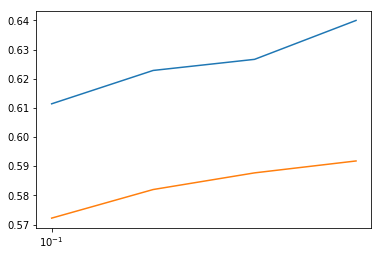

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(C_array,testAcc)
plt.plot(C_array,validAcc)
plt.xscale('log')
plt.show()

In [ ]:
# Load the data and cleanup

In [ ]:
#Analysis of the input data
# ...

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [ ]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *